## Super Sotre Dataset

#### Here we Predict the Order date by Decision tree

#### Check the Highest profit and Lowest Profit and Discuss about the improvement  (Exploratory Data Analysis(EDA)


##### Importing Requried Libraries

In [1]:
import pandas as pd
import numpy as np
# For offline use
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns

##### Import Datset

In [2]:
df=pd.read_csv("Superstore.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df['Product Name'].head()

0                    Bush Somerset Collection Bookcase
1    Hon Deluxe Fabric Upholstered Stacking Chairs,...
2    Self-Adhesive Address Labels for Typewriters b...
3        Bretford CR4500 Series Slim Rectangular Table
4                       Eldon Fold 'N Roll Cart System
Name: Product Name, dtype: object

In [12]:
print(df['Category'])

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object


In [14]:
no_of_state=df['State'].unique()
print("no of state."%no_of_state)
no_of_state

no of state.


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

##### we find first order date using Decision tree

In [16]:
input=df.drop('Order Date',axis='columns')
input.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
target=df['Order Date']
target.head()

0    08-11-2016
1    08-11-2016
2    12-06-2016
3    11-10-2015
4    11-10-2015
Name: Order Date, dtype: object

In [18]:
inputs=df.drop(['Row ID','Order ID','Order Date','Ship Date','Ship Mode','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Sales','Discount','Profit'],axis='columns')
inputs.head()

,Customer ID,Quantity
0,CG-12520,2
1,CG-12520,3
2,DV-13045,2
3,SO-20335,5
4,SO-20335,2


In [22]:
from sklearn.preprocessing import LabelEncoder
Customer_ID=LabelEncoder()
Quantity=LabelEncoder()
inputs['Customer_ID']=Customer_ID.fit_transform(inputs['Customer ID'])
inputs['Quantity']=Quantity.fit_transform(inputs['Quantity'])
inputs.head()
Order_date_find=inputs.drop('Customer ID',axis='columns')
Order_date_find.head()



,Quantity,Customer_ID
0,1,143
1,2,143
2,1,237
3,4,705
4,1,705


In [19]:
target.head()

0    08-11-2016
1    08-11-2016
2    12-06-2016
3    11-10-2015
4    11-10-2015
Name: Order Date, dtype: object

In [23]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(Order_date_find,target)

DecisionTreeClassifier()

In [24]:
model.score(Order_date_find,target)

0.5742445467280368

In [25]:
model.predict([[705,2]])   # give an customer ID and Quantity then we got the exact Order date that product

C:\Users\Aditya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['17-07-2016'], dtype=object)

In [26]:
model.predict([[143,1]])

C:\Users\Aditya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['13-11-2015'], dtype=object)

##### We Find the Hights Profit as per SuperStore annum Revenue

In [27]:
print(df['Profit'].head(10))

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
5     14.1694
6      1.9656
7     90.7152
8      5.7825
9     34.4700
Name: Profit, dtype: float64


In [28]:
High_profit=df[df['Profit']>200]
High_profit.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
24,25,CA-2015-106320,25-09-2015,30-09-2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.63,3,0.0,240.2649
54,55,CA-2016-105816,11-12-2016,17-12-2016,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,10024,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,5,0.0,298.6855
144,145,CA-2017-155376,22-12-2017,27-12-2017,Standard Class,SG-20080,Sandra Glassco,Consumer,United States,Independence,...,64055,Central,OFF-AP-10001058,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.43,3,0.0,218.2518
149,150,CA-2016-114489,05-12-2016,09-12-2016,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,...,53132,Central,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1951.84,8,0.0,585.5520


##### let's Find the how much loss and concentrate to improve that

In [29]:
loss=df[df['Profit']<0]
loss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,22-11-2015,26-11-2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,22-11-2015,26-11-2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,16-07-2017,18-07-2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,17-09-2015,21-09-2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


In [30]:

total_loss=np.negative(loss['Profit']).sum()
total_loss

156131.2857

In [31]:
loss.groupby(by='Sub-Category').sum()
loss['Sub-Category'].value_counts()


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\2043382819.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss.groupby(by='Sub-Category').sum()


Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [32]:
loss.groupby(by='Category').sum()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\3091417950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss.groupby(by='Category').sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,3715725,42626448,257885.5868,2652,262.14,-60936.1090
Office Supplies,4467221,48505006,91608.6750,3425,547.20,-56615.2585
Technology,1403994,13627937,119212.8930,963,90.40,-38579.9182


In [34]:
loss.groupby(by='City').sum().head()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\4160658106.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loss.groupby(by='City').sum().head()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Abilene,6990,79605,1.392,2,0.8,-3.7584
Akron,51946,443120,1389.362,25,5.3,-359.5675
Albuquerque,4320,87105,23.976,3,0.2,-5.6943
Allen,6110,225006,274.270,9,1.3,-45.2559
Allentown,27569,54309,766.148,10,1.1,-249.4556


In [35]:
df.groupby(by='Ship Mode').sum()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\3810058674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Ship Mode').sum()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,
First Class,7498535,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,2784998,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,9601997,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,30059485,327908460,1.358216e+06,22797,955.02,164088.7875


Above we can see there are negative Profit in Same Day Ship mode,to better way we can add order charges as per product quantity

##### Sales as per the Sub-Catagoiries

In [41]:
from turtle import color, title


case1=df[['Sub-Category','Sales']]
case1.iplot(kind='bar',x='Sub-Category',y='Sales',title='Sales Rate as per Sub-Catagories',xTitle='Sub-Catagory',yTitle='Sales',color='tomato')

Clearly identify the Fasteners and Lables are need to improving

##### Profit Rate as per Cities

In [57]:
from turtle import color, title


case1=df[['City','Profit']]
case1.iplot(kind='bar',x='City',y='Profit',title='Profit Rate as per Cities',xTitle='City',yTitle='Profit')

Clearly know about all cities how much profit they have and such as a many cities need to improvments and take Discounts to get more Profit

<AxesSubplot: xlabel='Segment', ylabel='count'>

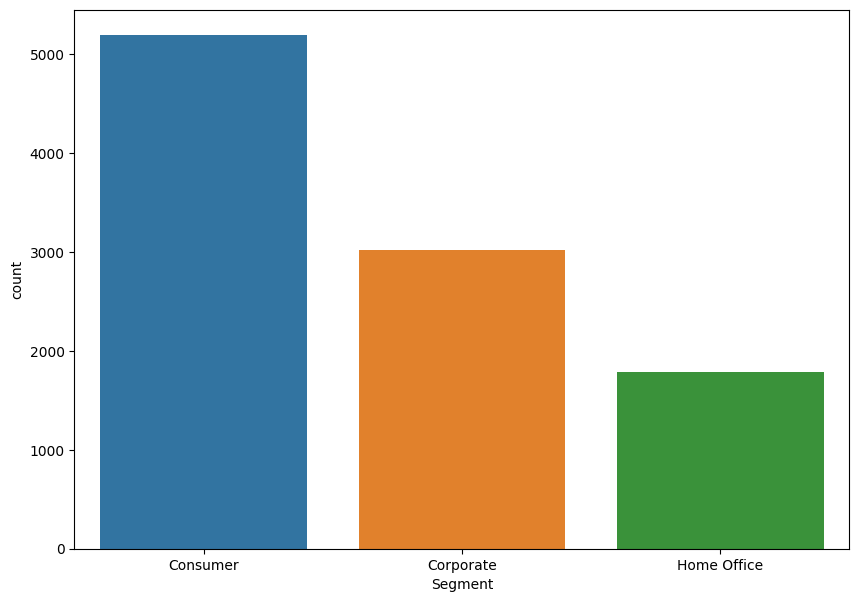

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(x=df.Segment)

In Home Office segments we obseeve the very less count,So here also need to improvent

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\1899853240.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Aditya\AppData\Local\Temp\ipykernel_3156\1899853240.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

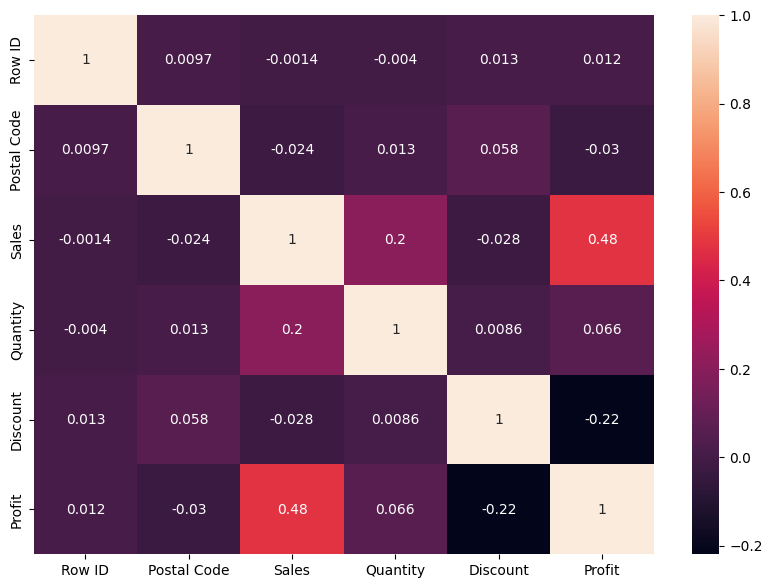

In [65]:

df.corr()  # set a Correlation in Dataset
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)


With this heatmap we can esally find correlations each Row and Column
1) we know the Sales and Profit are Correlated Positively
2) We know the Discount and Profit are Correlated Negatively